c:\users\игорь.000\appdata\local\programs\python\python39\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


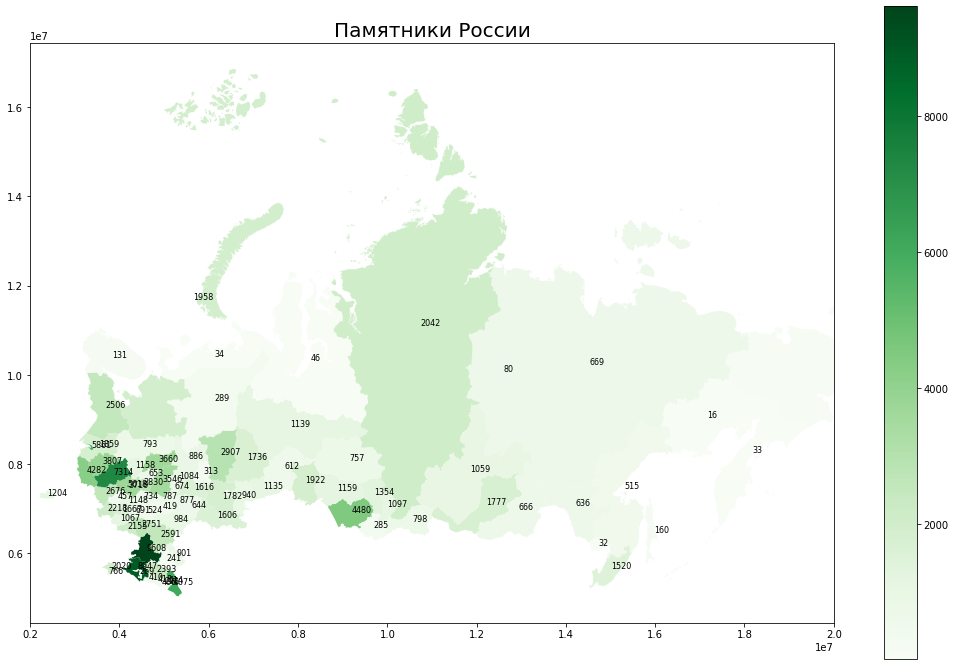

1616


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import descartes

data = pd.read_csv("data-44-structure-4.csv", low_memory=False)
data = data.dropna(axis=1)
region = data.groupby("Регион").count().reset_index()
region["Регион"] = region["Регион"].str.upper()
data = gpd.read_file("russia.json")
data = data.to_crs({'init': 'epsg:3857'})
data["NL_NAME_1"] = data["NL_NAME_1"].str.upper()
data = data.replace({
    "ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ": "ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА",
    "РЕСПУБЛИКА АДЫГЕЯ": "РЕСПУБЛИКА АДЫГЕЯ (АДЫГЕЯ)",
    "ЧУВАШСКАЯ РЕСПУБЛИКА": "ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ",
    "РЕСПУБЛИКА МАРИЙ-ЭЛ": "РЕСПУБЛИКА МАРИЙ ЭЛ",
    "РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ": "РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ",
    "РЕСПУБЛИКА ТАТАРСТАН": "РЕСПУБЛИКА ТАТАРСТАН (ТАТАРСТАН)"
})
data = pd.merge(left=data, right=region, left_on="NL_NAME_1", right_on="Регион", how="left")

fig = plt.figure(figsize=(18, 12))
area = plt.subplot(1, 1, 1)
data.plot(ax=area, legend=True, column="Объект", cmap="Greens")
area.set_xlim(2e6, 2e7)
plt.title("Памятники России", fontsize=20)
for _, reg in data.iterrows():
    area.annotate(reg["Объект"],
                 xy=(reg.geometry.centroid.x,
                    reg.geometry.centroid.y), fontsize=8)
plt.savefig("object_map.png")    
plt.show()
print(region[region["Регион"] == "РЕСПУБЛИКА ТАТАРСТАН (ТАТАРСТАН)"]["Объект"].iloc[0])